# 핫딜이 뜨면 카톡으로 알려주는 프로그램

* 난이도 : ★★★★☆☆☆☆☆☆
* 필요라이브러리: requests, BeautifulSoup4


* 해외직구를 좀 아시는 분들이라면 모두 알만한 핫딜 사이트 슬릭딜을 크롤링합니다.
* 내가 설정해놓은 상품이 원하는 가격 이하로 나타나면 카카오톡으로 내게 알려주는 프로그램 입니다.
* 카카오톡의 내게 글쓰기 API 를 사용해야 합니다.

### 검색어를 입력해서 주소를 확인합니다.

![image.png](images/slickdeals_url.jpg)

* 먼저 핫딜사이트에 접속해 검색어를 입력해봅니다.
* 브라우저의 주소를 확인해 URL을 분석합니다.

In [ ]:
import requests
from bs4 import BeautifulSoup

url = "https://slickdeals.net/newsearch.php?src=SearchBarV2&q=oculus+go&pp=20"
r = requests.get(url)
r.text

### 개발자도구를 사용해 원하는 항목을 찾아냅니다.

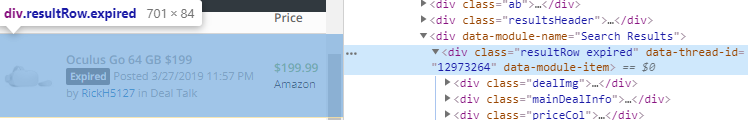

In [ ]:
# 크롤링에 필요한 라이브러리
import requests
from bs4 import BeautifulSoup

# 핫딜 사이트 검색 URL
url = "https://slickdeals.net/newsearch.php?src=SearchBarV2&q=oculus+go&pp=20"
r = requests.get(url)
bs = BeautifulSoup(r.text, "lxml")

# 개발자도구를 사용해서 검색 결과 목록의 ROW 을 파싱
rows = bs.select("div.resultRow")

# 검색 목록만큼 반복
for r in rows:
    # 해당 상품의 링크 파싱
    link = r.select("a.dealTitle")[0]
    
    # 링크 주소가 상대주소라 앞에 사이트 도메인 정보를 더함
    href = "https://slickdeals.net" + link.get("href")
    
    # 상품 제목
    title = link.text
    
    # 가격정보
    price = r.select("span.price")[0].text.replace("$", "").lower().replace("free", "0").replace(",", "").strip()
    
    # 가격이 없는 정보는 0으로 셋팅
    if len(price) == 0:
        price = "0"
    
    # 외국 사이트라 123.5 달라.센트 구조라 float 형으로 캐스팅
    price = float(price)
    
    # 핫딜 마크가 있는지 파싱
    hot = len(r.select("span.icon-fire"))
    
    # expried 마크가 있는지 파싱
    expired = len(r.select("div.expired"))
    
    # 가격이 0이거나 expired 되었으면 반복문 계속
    if price == 0 or expired == 1:
        continue
    
    # 화면에 출력해봄
    print((title, price, hot, expired))
 

### 카카오톡 나에게 보내기
* 카카오톡 개발자 사이트 주소 https://developers.kakao.com/
* 카카오톡 개발자 사이트에 접속하여 카카오톡 로그인을 먼저 합니다.
* 개발자 사이트 하단의 앱 개발 시작하기를 클릭합니다.
* 내애플리케이션에 앱 만들기를 통해 적당한 앱 이름과 회사명을 입력합니다.
* 앱만들기 완료후 좌측 사용자 관리 메뉴를 클릭합니다.



![kakao_1](images/kakao_1.jpg)
* 사용자 관리를 ON 상태로 만듭니다.



![kakao_1](images/kakao_2.jpg)
* 프로필 정보(닉네임/프로필 사진) 은 디폴트 항목이라 수집목적을 알아서 잘 써줍니다.



![kakao_1](images/kakao_3.jpg)
* 접근권한 관리 항목탭에서 카카오톡 메세지 전송의 수집조건과 수집목적을 작성하고 반드시 하단의 저장 버튼을 클릭하여 설정을 저장해야 합니다.


![kakao_1](images/kakao_4.jpg)
* 상단의 개발가이드 링크를 클릭합니다.

![kakao_1](images/kakao_5.jpg)
* ①좌측의 REST API 도구 메뉴를 클릭하고 ②대상 앱을 선택 후 ③우측에 카카오계정으로 로그인 버튼을 클릭합니다.

![kakao_1](images/kakao_6.jpg)
* 동의창이 뜨면 중간에 카카오톡 메세지 전송이 반드시 체크되어야 카톡 메세지가 발송됩니다. 꼭 체크 하시고 동의하고 계속하기를 클릭합니다.


![kakao_1](images/kakao_7.jpg)
* Access token 값을 복사해서 파이썬에 적당한 이름으로 붙여넣기 합니다.
* https://developers.kakao.com/docs/restapi/kakaotalk-api#%EB%82%98%EC%97%90%EA%B2%8C-%EB%B3%B4%EB%82%B4%EA%B8%B0 카카오톡 내게 보내기 레퍼런스를 참고하여 API 를 사용하면 됩니다

In [ ]:
import json

# 카카오톡 Access 토큰
KAKAO_TOKEN = "mJRnkHsHRAU_tfrq82W-6u3XLSbyGzFxASCF8QopyWAAAAFqgXQtsQ"

# 보낼 문자열 데이터
text = "카카오톡 내게 보내기 연습"

# 카카오톡 내게 보내게 API 양식에 맞게 설정
header = {"Authorization": 'Bearer ' + KAKAO_TOKEN}
url = "https://kapi.kakao.com/v2/api/talk/memo/default/send"
post = {
    "object_type": "text",
    "text": text,
    "link": {
        "web_url": "https://developers.kakao.com",
        "mobile_web_url": "https://developers.kakao.com"
    },
}
data = {"template_object": json.dumps(post)}

# API 호출
r = requests.post(url, headers=header, data=data)

# 리턴 값이 result_code: 0 이 오면 전송성공
print(r.text)

### 필요한 기능은 다 만들었으니 이제 프로그램을 완성합니다.

* 작성한 기능을 함수화 시킵니다.

In [ ]:
# 크롤링과 카톡 API 호출에 필요한 라이브러리
import requests
from bs4 import BeautifulSoup
import json
import time

# 카카오톡 Access 토큰
KAKAO_TOKEN = "mJRnkHsHRAU_tfrq82W-6u3XLSbyGzFxASCF8QopyWAAAAFqgXQtsQ"

# 메세지를 보낸 상품을 기억하고 있을 리스트 변수
send_lists = []

def send_kakao(text):
    '''카카오톡 내게 보내기로 메세지를 전송하는 함수
    
    Args:
        text (str) : 보낼 문자열
    
    Returns:
        Response : 카톡 API 호출 응답 객체
    '''
    # 카카오톡 내게 보내게 API 양식에 맞게 설정
    header = {"Authorization": 'Bearer ' + KAKAO_TOKEN}
    url = "https://kapi.kakao.com/v2/api/talk/memo/default/send"
    post = {
        "object_type": "text",
        "text": text,
        "link": {
            "web_url": "https://developers.kakao.com",
            "mobile_web_url": "https://developers.kakao.com"
        },
    }
    data = {"template_object": json.dumps(post)}

    # API 호출
    return requests.post(url, headers=header, data=data)


def get_hot_deals(keyword):
    '''핫딜 사이트를 크롤링하여 상품 목록을 구해오는 함수
    
    Args:
        keyword (str) : 상품명
        
    Returns:
        list : 상품목록 튜플(상품명, 가격, 핫딜, 종료, 링크주소)
    '''
    # 핫딜 사이트 검색 URL
    url = "https://slickdeals.net/newsearch.php?src=SearchBarV2&q={}&pp=20".format(keyword.replace(" ", "+"))
    r = requests.get(url)
    bs = BeautifulSoup(r.text, "lxml")

    # 개발자도구를 사용해서 검색 결과 목록의 ROW 을 파싱
    rows = bs.select("div.resultRow")

    # 최종 결과를 리턴할 리스트 변수
    results = []
    # 검색 목록만큼 반복
    for r in rows:
        # 해당 상품의 링크 파싱
        link = r.select("a.dealTitle")[0]

        # 링크 주소가 상대주소라 앞에 사이트 도메인 정보를 더함
        href = "https://slickdeals.net" + link.get("href")

        # 상품 제목
        title = link.text

        # 가격정보
        price = r.select("span.price")[0].text.replace("$", "").lower().replace("free", "0").replace(",", "").strip()

        # 가격이 없는 정보는 0으로 셋팅
        if len(price) == 0:
            price = "0"

        # 외국 사이트라 123.5 달라.센트 구조라 float 형으로 캐스팅
        price = float(price)

        # 핫딜 마크가 있는지 파싱
        hot = len(r.select("span.icon-fire"))

        # expried 마크가 있는지 파싱
        expired = len(r.select("div.expired"))

        # 가격이 0이거나 expired 되었으면 반복문 계속
        if price == 0 or expired == 1:
            continue

        # 화면에 출력해봄
        results.append((title, price, hot, expired, href))
    return results


def main():
    '''5분에 한번씩 반복하며 핫딜을 검색하여 조건에 만족하면 카톡을 발송할 메인 함수'''
    
    # 검색어
    keyword = "ipad"
    
    # 최하가격 (이 이하면 가격 이상이라고 판단)
    min_price = 100.0
    # 최대가격 (이 가격 이하인 상품만 대상)
    max_price = 250.0
    
    # 무한루프
    while True:
        # 핫딜사이트에 검색어에 해당하는 상품 목록을 받아옴
        results = get_hot_deals(keyword)
        
        if results is not None:
            # 검색 목록 요소 반복
            for r in results:
                title = r[0]
                price = r[1]
                hot = r[2]
                href = r[4]

                # 최소가격보다 크고 최대 가격보다 작으면
                if min_price < price < max_price:
                    # 보낸 기록에 없는 상품인 경우에만 메세지를 보냄
                    if (len([s for s in send_lists if s["title"] == title])) < 1:
                        # 카톡으로 어떻게 보낼지 설정
                        msg = "{} {} {} {}".format(title, price, hot, href)
                        # 카톡 발송
                        send_kakao(msg)
                        # 보낸 리스트에 저장
                        send_lists.append({
                            "title": title,
                            "price": price,
                            "hot": hot,
                            "href": href,
                        })
                    else:
                        print("{} 보낸적 있음".format(title))
                
        # 60초 * 5 = 5분동안 대기
        time.sleep(60 * 5)
main()